<style type="text/css">
.time_spent {
    width: 3em;
    border-style: none;
    background-color: silver;
    font-weight: bold;
    padding-left: 5px;
}
</style>

# Mathematics for Robotics and Control SS2016
## Assignment 8: Laplace Transforms

In [1]:
import IPython.core.display
import sys
if not "win" in sys.platform and not "linux" in sys.platform:
    %pylab
else:
    %pylab inline

/home/ramesh/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


---

#### Assignment 8.2 **<span style="color: orange;">L2</span>**

Find the Laplace transform Y(s) of the following functions:
    
1. $y(t) = e^{-2 \cdot t} \cdot u(t) + e^{-3 \cdot t} \cdot u(t)$
2. $y(t) = e^{-3 \cdot t} \cdot u(t) + e^{2 \cdot t} \cdot u(-t)$
3. $y(t) = e^{2 \cdot t} \cdot u(t) + e^{-3 \cdot t} \cdot u(-t)$

Figure out how to obtain the Laplace transforms inside this notebook, without doing it manually.

In [160]:
#1. y(t)=e^(−2⋅t)⋅u(t)(+e^(−3⋅t)⋅u(t) 
import sympy as sp
sp.init_printing()
from sympy import laplace_transform
from sympy import inverse_laplace_transform
from sympy.abc import t,s,a

f = sp.Function('f')(t)
#since step function is defined as 1 when t > 0 and 0 then t < 0
step = sp.symbols('step')
step = 1
laplace = laplace_transform(sp.exp(-2*t)*step +sp.exp(-3*t)*step,t,s)
print laplace


((2*s + 5)/((s + 2)*(s + 3)), 0, True)


In [159]:
import sympy as sp
sp.init_printing()
from sympy import laplace_transform
from sympy.abc import t,s,a,u
f = sp.Function('f')(t)
#since step function is defined as 1 when t > 0 and 0 then t < 0
laplace = laplace_transform(sp.exp(-3*t)*1 +sp.exp(2*t)*0,t,s)
laplace

(1/(s + 3), 0, True)

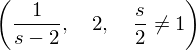

In [41]:
import sympy as sp
sp.init_printing()
from sympy import laplace_transform
from sympy.abc import t,s,a,u
f = sp.Function('f')(t)
laplace = laplace_transform(sp.exp(2*t)*1 +sp.exp(-3*t)*0,t,s)
laplace

---

Assignment 8.3 **<span style="color: red;">L3</span>**

# Application of Laplace Transform to solve ODE

The Laplace transform can be applied to solve initial value problem that contains
homogeneous and non-homogeneous linear differential equations.

ODE -> (Laplace Transform) -> Solve the laplace equations -> (Inverse Transform) -> ODE solution

Solve the below ODE using laplace transform K

1. $ \ddot{y}(t) -2\dot{y}(t) + y(t) = e^{2t} $ ,  $ y(0) = \dot{y}(0) = 0 $
2. $  \frac{d^2y}{dt^2} + y = t $ , $ y(0) = 1, y'(0) = 2 $

#### Solution 8.3
### ...
1. $ \ddot{y}(t) -2\dot{y}(t) + y(t) = e^{2t} $ ,  $ y(0) = \dot{y}(0) = 0 $

Applying laplace transform on both sides, we have 

$$s^2Y(s) - sy(0) - y'(0) - 2(sY(s) - y(0)) + Y(s) = \frac{1}{s-2}$$

Applying initial conditions, we have :

$$s^2Y(s) - 2sY(s) + Y(s) = \frac{1}{s-2}$$

$$Y(s) = \frac{1}{(s-2)(s^2 - 2s + 1)}$$

Applying inverse laplace, using sympy , we have

In [8]:
import sympy as sp
from sympy import *
sp.init_printing()
from sympy.abc import s,t,y

laplace = laplace_transform(sp.Derivative(y(t),t,t) - 2*sp.Derivative(y(t),t) + y(t) - sp.exp(2*t),t,s)
#Taking Partial fraction of Y(s) we get
partial_fraction = sp.apart(1/((s-2)*(s**2 - 2*s + 1)))
inverse = (inverse_laplace_transform(partial_fraction,s,t))

inverse

Therefore, inverse laplace of above equation is : 

$$y(t)= (e^{2t} - te^{t} - e^{t})\theta(t)$$

where $\theta(t)$ is heaviside function


2*. $  \frac{d^2y}{dt^2} + y = t $ , $ y(0) = 1, y'(0) = 2 $

Applying Laplace transform on both sides, we have :

$$s^2 Y(s) - sy(0) - y'(0) + Y(s) = \frac{1}{s^2}$$

Applying initial condtions : y(0) = 1 , y'(0) = 2 , we get 

$$s^2 Y(s) - s - 2 + Y(s) = \frac{1}{s^2}$$

$$Y(s)(s^2 + 1) = \frac{s^3 + 2s^2 + 1}{s^2}$$

$$Y(s) = \frac{s^3 + 2s^2 + 1}{s^2(s^2+1)}$$

It can be re-written as :

$$ Y(s) = \frac{s}{s^{2} + 1} + \frac{2}{s^{2} + 1} + \frac{1}{s^{2} \left(s^{2} + 1\right)} $$


In [14]:
import sympy as sp
from sympy import *
sp.init_printing()
from sympy.abc import s,t,y
y =  s/(s**2 +1) + 2/(s**2 + 1) + (1/s**2)/(s**2 + 1)
#take inverse laplace of y, we have 
inverse = inverse_laplace_transform(y,s,t)
inverse

Therefore, inverse laplace of above equation is : 

$$y(t)= \left(t - \sin{\left (t \right )}\right) \theta\left(t\right) + 2 \sin{\left (t \right )} \theta\left(t\right) + \cos{\left (t \right )} \theta\left(t\right)$$

where $\theta(t)$ is heaviside function


---

#### Assignment 8.4 **<span style="color: green;">L1</span>**

**control** library can be used to create a model by specifying the statespace equations.
(control state space )[http://python-control.readthedocs.io/en/latest/generated/control.StateSpace.html]

For the state space equations from the previous assignment (MRC_A_007, Exercise 1 and 2) please create the state space models.

Determine the Poles and Zeros for all the state space models.


In [157]:
import numpy as np
import control
A = np.array([[0, 1],[-2, -1]])

B = np.array([[0],[5]])

C = np.array([0, 1])

D = np.array([0])

state_space_model =control.ss(A,B,C,D)
zeros = state_space_model.zero()
print zeros
poles = state_space_model.pole()
print poles



[  4.44089210e-17]
[-0.5+1.32287566j -0.5-1.32287566j]


In [6]:
import numpy as np
import control
import sympy as sp

A = np.array([[1, 0, 0],[0, 1, 0],[0,0,1]])

B = np.array([[1],[0],[0]])

C = np.array([[0,0,1],[1,4,0]])

D = np.array([[0],[0]])

state_space_model =control.ss(A,B,C,D) 
poles = state_space_model.pole()
print poles
#since for zeros it gives error as it can only determine for single input single output.
zeros = state_space_model.zero()
print zeros

[ 1.00000657 +0.00000000e+00j  0.99999671 +5.69145455e-06j
  0.99999671 -5.69145455e-06j]


NotImplementedError: StateSpace.zeros is currently implemented only for SISO systems.

In [161]:
import numpy as np
import control
A = np.array([[0, 1],[-1, -3]])
B = np.array([[0,0],[2,4]])

C = np.array([1, 0])
D = np.array([0,1])
state_space_model =control.ss(A,B,C,D) 
poles = state_space_model.pole()
print poles
#since for zeros it gives error as it can only determine for single input single output.
zeros = state_space_model.zero()
print zeros

[-2.61803399 -0.38196601]


NotImplementedError: StateSpace.zeros is currently implemented only for SISO systems.

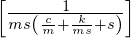

In [15]:
#Transfer function for Mass Damper system

import control 
import numpy as np
import sympy as sp

sp.init_printing()
k,m,c,s = sp.symbols('k,m,c,s')
#to convert state space into transfer function we have,
# T(s) = C([sI-A]^-1)B+D
A = sp.Matrix([[0,1],[-k/m, -c/m]])
B = sp.Matrix([[0],[1/m]])
C = sp.Matrix([[1,0]])
D = sp.Matrix([0])
#To compute transfer function , formula is used as :
# Transfer function = C*((SI - A)^-1)*B + D
identity_matrix = sp.Matrix([[1,0],[0,1]])

Identity_s = s*identity_matrix

subtract_SI_A = Identity_s-A
inverse = subtract_SI_A.inv()
product_c_with_inverse = C*inverse
transfer_function = product_c_with_inverse*B + D
transfer_function

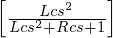

In [151]:
#Transfer function for RLC circuit

import numpy as np
import control
sp.init_printing()
import sympy as sp
L,C,R,c,s =  sp.symbols('L,C,R,c,s')

A = sp.Matrix([[0,1/c],[-1/L, -R/L]])
B = sp.Matrix([[0],[1/L]])
C = sp.Matrix([[-1, -R]])
D = sp.Matrix([1])
#To compute transfer function , formula is used as :
# Transfer function = C*((SI - A)^-1)*B + D
I = sp.Matrix([[1,0],[0,1]])
SI = s*I
subtract_SI_A = SI-A
inverse = subtract_SI_A.inv()
product_c_with_inverse = C*inverse
transfer_function = sp.simplify(product_c_with_inverse*B + D)
transfer_function